###Creating Chat Bots with Python - Part One

In [0]:
#Part one
#----Load the Data
#----Explore the Data Format
#----Create a Vocabulary

In [0]:
import pickle
import numpy as np

In [0]:
with open('/content/train_qa.txt','rb') as f:
  train_data=pickle.load(f)

In [0]:
with open('/content/test_qa.txt','rb') as f:
  test_data=pickle.load(f)

In [187]:
type(train_data)

list

In [188]:
type(test_data)

list

In [189]:
#Length of training data
len(train_data)

10000

In [190]:
#Length of test data
len(test_data)

1000

In [191]:
#grab the first one from training data
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [0]:
#Story: 'Mary',  'moved',  'to',  'the',  'bathroom',  '.',  'Sandra',  'journeyed',  'to',  'the',  'bedroom',  '.'
#Question: 'Is', 'Sandra', 'in', 'the', 'hallway', '?'
#Answer: No

In [193]:
#Lets look at the same thing in a proper format but only story
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [194]:
#Lets look at the question alone
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [195]:
#Lets look at the answer alone
train_data[0][2]

'no'

In [0]:
#Create a vocabulary of all the words inside the dataset
#We should take the training data as well as the test data while creating the vocabulary
#While testing we don't get confused when coming across new names that didn't show up in training data
#but showed up in the test data
#Let us create the vocabulary
all_data=test_data + train_data
#The test data and the train data is a huge list of tuples
#all data will be a giant list with bunch of tuples in it

In [197]:
len(all_data)

11000

In [198]:
#Let us see the functionality of set on the first story
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [0]:
#We create a set to add words to this
#We choose Set because it doesn't accept duplicates
#So, this set will contain all the unique words from teh training and test data thereby creating a vocabulary
#Set in Python is unordered collection of unique elements

vocab=set()

for story,question,answer in all_data:
  vocab=vocab.union(set(story))
  vocab=vocab.union(set(question))

In [0]:
vocab.add('no')

In [0]:
vocab.add('yes')

In [202]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
#We add one to the length of vocab because later on we use keras pad sequences
vocab_len=len(vocab)+1

In [204]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [205]:
vocab_len

38

In [206]:
all_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [207]:
all_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [0]:
#We need to figure out
#How long is the longest story?
#How long is the longest question?

In [0]:
#Check the LONGEST STORY
all_story_lens=[len(data[0]) for data in all_data]

In [210]:
all_story_lens

[12,
 23,
 35,
 47,
 59,
 13,
 26,
 37,
 50,
 62,
 12,
 24,
 37,
 49,
 60,
 12,
 25,
 38,
 50,
 62,
 12,
 24,
 36,
 47,
 59,
 12,
 25,
 36,
 48,
 59,
 12,
 26,
 39,
 51,
 63,
 13,
 24,
 37,
 50,
 62,
 13,
 26,
 38,
 50,
 63,
 13,
 25,
 36,
 49,
 61,
 13,
 26,
 39,
 51,
 64,
 13,
 25,
 37,
 50,
 62,
 13,
 25,
 37,
 50,
 61,
 12,
 25,
 38,
 50,
 62,
 12,
 25,
 37,
 50,
 61,
 12,
 25,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 60,
 13,
 25,
 37,
 49,
 60,
 13,
 25,
 39,
 51,
 64,
 12,
 25,
 37,
 49,
 61,
 12,
 25,
 38,
 50,
 61,
 12,
 24,
 36,
 49,
 62,
 13,
 25,
 37,
 50,
 62,
 12,
 23,
 35,
 47,
 59,
 12,
 25,
 37,
 48,
 73,
 12,
 24,
 37,
 49,
 61,
 12,
 24,
 37,
 49,
 62,
 14,
 26,
 37,
 49,
 62,
 12,
 23,
 35,
 48,
 59,
 12,
 24,
 36,
 49,
 61,
 13,
 25,
 37,
 49,
 61,
 12,
 25,
 37,
 50,
 62,
 12,
 24,
 36,
 47,
 58,
 12,
 24,
 36,
 48,
 61,
 25,
 38,
 50,
 62,
 74,
 13,
 25,
 37,
 49,
 62,
 12,
 24,
 37,
 49,
 62,
 12,
 24,
 36,
 48,
 60,
 12,
 24,
 36,
 48,
 61,
 12,
 25,
 36,
 50,
 62,


In [0]:
max_story_len=max(all_story_lens)

In [0]:
#LONGEST QUESTION
max_question_len=max([len(data[1]) for data in all_data])

In [213]:
max_question_len

6

###Creating Chat Bots with Python - Part Two

In [0]:
#Understand steps on how to vectorize the Data
#Create a function that can vectorize data for us

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [0]:
#Create integer encoding for the sequence of words
tokenizer=Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [217]:
tokenizer.word_index
#Every word is given a uniqueid

{'.': 35,
 '?': 8,
 'apple': 28,
 'back': 2,
 'bathroom': 25,
 'bedroom': 13,
 'daniel': 23,
 'discarded': 24,
 'down': 32,
 'dropped': 18,
 'football': 17,
 'garden': 30,
 'got': 26,
 'grabbed': 3,
 'hallway': 33,
 'in': 34,
 'is': 15,
 'john': 6,
 'journeyed': 5,
 'kitchen': 37,
 'left': 31,
 'mary': 12,
 'milk': 1,
 'moved': 19,
 'no': 11,
 'office': 21,
 'picked': 36,
 'put': 14,
 'sandra': 27,
 'the': 7,
 'there': 29,
 'to': 9,
 'took': 20,
 'travelled': 10,
 'up': 22,
 'went': 16,
 'yes': 4}

In [0]:
train_story_text=[]
train_question_text=[]
train_answers=[]

In [0]:
for story,question,answer in train_data:
  train_story_text.append(story)
  train_question_text.append(question)
  train_answers.append(answer)

In [220]:
#This contains only stories
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [221]:
 #This contains only question
train_question_text

[['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'office', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'hallway', '?'],
 ['Is', 'Mary', 'in', 'the', 'garden', '?'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 ['Is', 'Sandra', 'in', 'the', 'bathroom', '?'],
 ['Is', 'Sandra', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Mary', 'in', 'the', 'bedroom', '?'],
 ['Is', 'Mary', 'in', 'the', 'kitchen', '?'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 ['Is', '

In [222]:
#This contains only answers
train_answers

['no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'yes',


In [0]:
train_story_seq=tokenizer.texts_to_sequences(train_story_text)

In [224]:
len(train_story_seq)

10000

In [225]:
len(train_story_text)

10000

In [226]:
train_story_seq
#Mary is 12 here

[[12, 19, 9, 7, 25, 35, 27, 5, 9, 7, 13, 35],
 [12,
  19,
  9,
  7,
  25,
  35,
  27,
  5,
  9,
  7,
  13,
  35,
  12,
  16,
  2,
  9,
  7,
  13,
  35,
  23,
  16,
  2,
  9,
  7,
  33,
  35],
 [12,
  19,
  9,
  7,
  25,
  35,
  27,
  5,
  9,
  7,
  13,
  35,
  12,
  16,
  2,
  9,
  7,
  13,
  35,
  23,
  16,
  2,
  9,
  7,
  33,
  35,
  27,
  16,
  9,
  7,
  37,
  35,
  23,
  16,
  2,
  9,
  7,
  25,
  35],
 [12,
  19,
  9,
  7,
  25,
  35,
  27,
  5,
  9,
  7,
  13,
  35,
  12,
  16,
  2,
  9,
  7,
  13,
  35,
  23,
  16,
  2,
  9,
  7,
  33,
  35,
  27,
  16,
  9,
  7,
  37,
  35,
  23,
  16,
  2,
  9,
  7,
  25,
  35,
  23,
  36,
  22,
  7,
  17,
  29,
  35,
  23,
  16,
  9,
  7,
  13,
  35],
 [12,
  19,
  9,
  7,
  25,
  35,
  27,
  5,
  9,
  7,
  13,
  35,
  12,
  16,
  2,
  9,
  7,
  13,
  35,
  23,
  16,
  2,
  9,
  7,
  33,
  35,
  27,
  16,
  9,
  7,
  37,
  35,
  23,
  16,
  2,
  9,
  7,
  25,
  35,
  23,
  36,
  22,
  7,
  17,
  29,
  35,
  23,
  16,
  9,
  7,
  13,
  35,
  

In [0]:
#We will create a function to vectorize these stories
#We want to vectorize stories,questions and answers into padded sequences
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_question_len=max_question_len):
  #STORIES ---> X
  X=[]

  #QUESTIONS ---> Xq
  Xq=[]


  #Y CORRECT ANSWER(yes/no)
  Y=[]

  for story,query,answer in data:
    #for each story
    #[23,14........]
    x = [word_index[word.lower()] for word in story]
    xq = [word_index[word.lower()] for word in query]
    y=np.zeros(len(word_index)+1)


    y[word_index[answer]]=1

    X.append(x)
    Xq.append(xq)
    Y.append(y)
  return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_question_len),np.array(Y))


In [0]:
inputs_train,queries_train,answers_train=vectorize_stories(train_data)

In [0]:
inputs_test,queries_test,answers_test=vectorize_stories(test_data)

In [230]:
inputs_test

array([[ 0,  0,  0, ...,  7, 13, 35],
       [ 0,  0,  0, ...,  7, 30, 35],
       [ 0,  0,  0, ...,  7, 30, 35],
       ...,
       [ 0,  0,  0, ...,  7, 28, 35],
       [ 0,  0,  0, ...,  7, 30, 35],
       [ 0,  0,  0, ..., 28, 29, 35]], dtype=int32)

In [231]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [232]:
tokenizer.word_index['yes']

4

In [233]:
tokenizer.word_index['no']

11

In [234]:
sum(answers_test)
#There are 497 ones at index position 4 i.e. 497 yes
#There are 503 ones at index position 11 i.e. 503 no

array([  0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,
       503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

###Creating Chat Bots with Python - Part Three

In [0]:
#Build the Neural Network
###Input Encoder M
###Input Encoder C
###Question Encoder
#Complete the Network

In [0]:
 from keras.models import Sequential,Model

In [0]:
from keras.layers.embeddings import Embedding

In [0]:
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [0]:
#We create placeholders for inputs
#shape we are going to pass here depends on teh max story length and max question length
#PLACE HOLDER shape=(max_story_len,batch_size)
input_sequence=Input((max_story_len,))
question=Input((max_question_len,))

In [0]:
#Create Input Encoders
#First thing to be done is define our vocabulary size
#We are creating a new variable vocab_size that is same as vocab_len
#Its just how many words you have in your vocabulary plus 1 for padding
vocab_size=len(vocab)+1

In [0]:
#INPUT ENCODER M
#This input gets embedded to a sequence of vectors
input_encoder_m=Sequential()
#WE add two layers
#1-Embedding layer
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
#2-Dropout layer
#0.3 means, 30 percent of neurons will be randomly turned off during the training, that helps in overfitting
input_encoder_m.add(Dropout(0.3))

#The output of this encoder is
#(samples,story_maxlen,embedding_dim)

In [0]:
#INPUT ENCODER C
input_encoder_c=Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

#The output of this encoder is 
#(samples,story_maxlen,max_question_len)

In [0]:
#QUESTION ENCODER
question_encoder=Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,output_dim=64,input_length=max_question_len))
question_encoder.add(Dropout(0.3))


#OUTPUT
#(samples,query_maxlen,embedding_dim)

In [0]:
#Below is the result of passing through the encoder
#ENCODED   <---- ENCODER(INPUT)
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(question)

In [0]:
#We should use dot product to compute the match between first input vector sequence and the query
match=dot([input_encoded_m,question_encoded],axes=(2,2))
match=Activation('softmax')(match)

In [0]:
#Add the above match matrix with the second input vector sequence
response=add([match,input_encoded_c])
response=Permute((2,1))(response)
#We are converting it have an output of samples by query max length by story max length
#So once we have our response we can concatenate the match matrix with teh question vector sequence

In [0]:
answer=concatenate([response,question_encoded])

In [248]:
answer
#? because we do not know the batch size yet

<tf.Tensor 'concatenate_3/concat:0' shape=(?, 6, 220) dtype=float32>

In [0]:
#We are going to reduce it with a Recurrent Neural Network
#We are specifically choosing LSTM for this
answer=LSTM(32)(answer)

In [0]:
answer=Dropout(0.5)(answer)
#Finally we have our dense output layer
answer=Dense(vocab_size)(answer)
#OUTPUT
#(samples,vocab_size)
#YES/NO 0000

In [0]:
#We need to output a probability distribution over teh vocabulary
#We will essentially see a bunch of zeroes except some probability on yes and some probability on no
#We'll pass it in through a softMax in order to turn it into a zero or one
answer=Activation('softmax')(answer)

In [0]:
model=Model([input_sequence,question],answer)
#answer is what links to all the encoders encoder c,encoder m,question encoder

In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [254]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_7 (Sequential)       multiple             2432        input_5[0][0]                    
__________________________________________________________________________________________________
sequential_9 (Sequential)       (None, 6, 64)        2432        input_6[0][0]                    
____________________________________________________________________________________________

###Creating Chat Bots with Python - Part Four

In [0]:
#Fit/Train the Network
#######We will load a pre-trained network
#plot out training history
#Evaluate on Test Set
#Create our own Stories and Questions

In [256]:
#Fit the model
#lets train for 3 epochs only
history=model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=3,validation_data=([inputs_test,queries_test],answers_test))
#Smaller batch size with longer gtraining epochs should lead to slightly better results
#But teh preloaded model is trained for 100 epochs


Train on 10000 samples, validate on 1000 samples
Epoch 1/3
10000/10000 [==============================] - 7s 711us/step - loss: 0.9082 - acc: 0.4892 - val_loss: 0.6968 - val_acc: 0.5030
Epoch 2/3
10000/10000 [==============================] - 6s 597us/step - loss: 0.7003 - acc: 0.5055 - val_loss: 0.6932 - val_acc: 0.5030
Epoch 3/3
10000/10000 [==============================] - 6s 596us/step - loss: 0.6963 - acc: 0.4943 - val_loss: 0.6945 - val_acc: 0.5030


In [257]:
#Fit the model
#lets train for 100 epochs
history=model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=100,validation_data=([inputs_test,queries_test],answers_test))
#Smaller batch size with longer gtraining epochs should lead to slightly better results
#But teh preloaded model is trained for 100 epochs


Train on 10000 samples, validate on 1000 samples
Epoch 1/100
10000/10000 [==============================] - 6s 592us/step - loss: 0.6956 - acc: 0.4926 - val_loss: 0.6933 - val_acc: 0.4970
Epoch 2/100
10000/10000 [==============================] - 6s 594us/step - loss: 0.6943 - acc: 0.5064 - val_loss: 0.6932 - val_acc: 0.4970
Epoch 3/100
10000/10000 [==============================] - 6s 585us/step - loss: 0.6950 - acc: 0.5017 - val_loss: 0.6945 - val_acc: 0.5030
Epoch 4/100
10000/10000 [==============================] - 6s 597us/step - loss: 0.6952 - acc: 0.4950 - val_loss: 0.6939 - val_acc: 0.5030
Epoch 5/100
10000/10000 [==============================] - 6s 587us/step - loss: 0.6951 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5030
Epoch 6/100
10000/10000 [==============================] - 6s 594us/step - loss: 0.6948 - acc: 0.4990 - val_loss: 0.6965 - val_acc: 0.4970
Epoch 7/100
10000/10000 [==============================] - 6s 585us/step - loss: 0.6948 - acc: 0.5064 - val_loss: 0.6

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


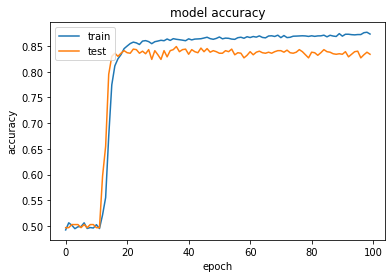

In [258]:
#plot the training history when number of epochs were 100
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
#Summarise history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [0]:
#Save the model
model.save('mybrandnewmodel.h5')

In [0]:
#Let us learn to load an existing model
######################model.load_weights('/content/chatbot_10.h5')
#This is a hundred epochs trained model

In [0]:
pred_results=model.predict(([inputs_test,queries_test]))

In [262]:
test_data
#this is a tuple which has story,question,answer

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [263]:
#Check the predresults
pred_results
#It is a bunch of probabilities for every single word

array([[5.2061064e-18, 7.2632587e-18, 4.9615087e-18, ..., 4.3766457e-18,
        6.5066962e-18, 5.5868498e-18],
       [2.3202731e-18, 2.8336873e-18, 1.9814574e-18, ..., 1.8781328e-18,
        2.3838293e-18, 2.2618944e-18],
       [5.7299248e-16, 5.3081353e-16, 5.3943595e-16, ..., 4.6482955e-16,
        5.0269261e-16, 4.9795934e-16],
       ...,
       [2.8545982e-16, 3.3650147e-16, 2.4432049e-16, ..., 2.2601208e-16,
        2.7708592e-16, 2.5823208e-16],
       [4.9542206e-13, 6.2517179e-13, 5.1257289e-13, ..., 3.6791791e-13,
        5.5305971e-13, 5.0076696e-13],
       [1.1146891e-09, 1.2179047e-09, 1.1223481e-09, ..., 9.1830099e-10,
        1.0579664e-09, 1.1722062e-09]], dtype=float32)

In [264]:
#Shape of the predictions
pred_results.shape
#So, we have 37 vocab words plus 1 extra for padding

(1000, 38)

In [265]:
#Take a look at the first prediction
pred_results[0]
#It makes sense the probabilities for random words like John is very low

array([5.2061064e-18, 7.2632587e-18, 4.9615087e-18, 5.5782463e-18,
       1.4228153e-09, 6.0748177e-18, 7.3243038e-18, 5.2637183e-18,
       5.8246717e-18, 6.6829117e-18, 6.7816043e-18, 1.0000000e+00,
       7.0328939e-18, 3.9135437e-18, 6.5835710e-18, 7.2888219e-18,
       8.5218537e-18, 7.3371392e-18, 6.3389708e-18, 6.7541601e-18,
       5.7824751e-18, 4.8566805e-18, 4.4159893e-18, 6.3365046e-18,
       5.6693991e-18, 4.8819794e-18, 6.6716534e-18, 6.3217287e-18,
       5.9792680e-18, 6.0635428e-18, 6.3847896e-18, 7.5175845e-18,
       6.0213153e-18, 5.3085044e-18, 4.6035306e-18, 4.3766457e-18,
       6.5066962e-18, 5.5868498e-18], dtype=float32)

In [266]:
#Take a look at the first test data story
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [267]:
#Take a look at the first test data question
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [268]:
#Take a look at the first test data answer
test_data[0][2]

'no'

In [0]:
#We perform argmax to figure out which of the words has maximum  probability
val_max=np.argmax(pred_results[0])

In [0]:
for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key

In [271]:
k

'no'

In [272]:
pred_results[0][val_max]

1.0

In [273]:
#Now we write own stories and questions
#Recall that we have a set vocabulary
vocab
#These are the only words our model will be aware of
#These are the only words we can use to test the model
#The story that we write should contain words only from thiss vocabulary
#Any words outside this vocabulary maybe proper nouns or verbs out of this vocabulary may not be used 
#as the model is aware of only these 38 words

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
my_story="John left the kitchen . Sandra dropped the football in the garden ."
#The reason why we are giving spaces is to ensure our story is in the same format as the training data

In [275]:
#Check if our written story is in the same format as the training data
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [0]:
#Create our question
my_question="Is the football in the garden ?"
#Question should also be splitted

In [277]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [0]:
#Lets create a dataset with one story, one question and one answer
mydata=[(my_story.split(),my_question.split(),'yes')]

In [279]:
mydata

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [0]:
#pass the above to vectorize_stories function
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [282]:
my_story

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,
        31,  7, 37, 35, 27, 18,  7, 17, 34,  7, 30, 35]], dtype=int32)

In [284]:
my_ques

array([[ 7, 17, 34,  7, 30,  8]], dtype=int32)

In [285]:
my_ans

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [0]:
#We call the model and ask to predict only  by giving the story and question
pred_results=model.predict(([my_story,my_ques]))

In [0]:
val_max=np.argmax(pred_results[0])

In [0]:
for key,val in tokenizer.word_index.items():
  if val==val_max:
    k=key

In [291]:
k

'yes'

In [292]:
#To know how sure the prediction was
pred_results[0][val_max]

0.97811663